### Preprocessing

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# read dataset
df = pd.read_csv('regression_geologic_dataset.csv')
df.describe()

,porosity,matrixperm,acousticimpedance,brittlenessratio,toc,vitrinitereflectance,productivitymetric
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,10.493805,433.075000,3.265735,57.794340,3.970700,1.571440,50.000000
std,2.079824,173.101415,0.623574,16.955346,1.907119,0.240662,11.505310
min,4.585000,113.000000,1.408000,13.128000,0.100000,0.744000,24.437856
25%,9.038750,312.250000,2.802250,45.306000,2.470000,1.416000,41.961030
50%,10.549000,403.500000,3.250500,59.412000,4.120000,1.568000,49.692285
75%,12.181750,528.750000,3.679500,69.915000,5.400000,1.714000,58.986667
max,16.485000,987.000000,5.093000,101.196000,8.720000,2.296000,77.270733


In [12]:
# drop features to prevent multi co-linearity problem
df.drop(['toc', 'matrixperm'], axis=1, inplace=True)

In [13]:
# turn datase into input feature and target feature
X = df.drop(['productivitymetric'], axis=1)
y = df['productivitymetric']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [15]:
y_train.describe()

count    100.000000
mean      49.301573
std       11.352800
min       24.579070
25%       41.712586
50%       48.776836
75%       56.938989
max       77.270733
Name: productivitymetric, dtype: float64

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

### Learning Curve

**Learning Curve** visualize the trade-off between bias and variance, and its dependence on training set size. Here, we will vary the training/validation set size to explore the behavior of the model score as a function of **the number of training points**, which can be done by using increasingly larger subsets of the data to fit our model. Hopefully, we can address the question of *whether adding more training data will help our model*.

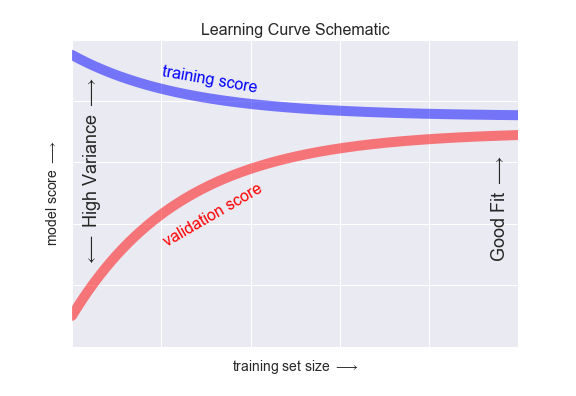

The general behavior from a learning curve:
* A model of a given complexity will **overfit a small dataset**: this means the training score will be relatively high, while the validation score will be relatively low.
* A model of a given complexity will **underfit a large dataset**: this means that the training score will decrease, but the validation score will increase.
* A model will **never**, except by chance, **give a better score to the validation set than the training set**: this means the curves should keep getting closer together but never cross.

In [17]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge

In [18]:
train_sizes = np.linspace(0.05, 1, 9)

In [19]:
train_sizes, train_scores, valid_scores, fit_times, _ = learning_curve(Ridge(), 
                                                                      X_train_scaled, 
                                                                      y_train, cv=10, 
                                                                      train_sizes=train_sizes, return_times=True)

In [20]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

Text(0, 0.5, 'Score')

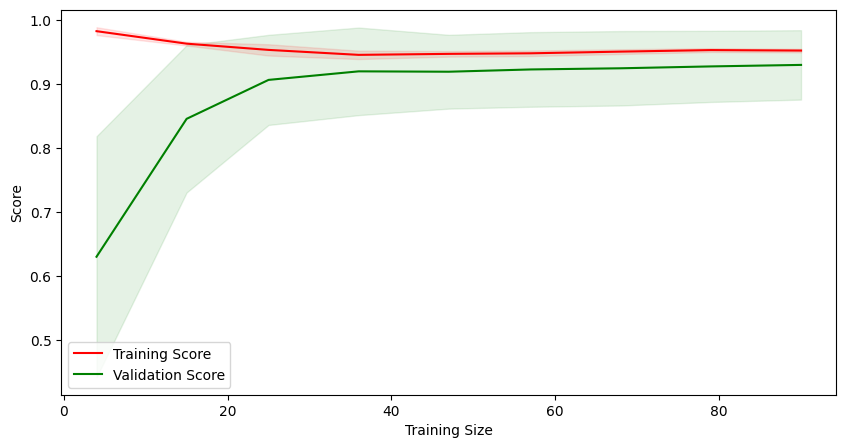

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.plot(train_sizes, train_scores_mean, label='Training Score', color='red')
axes.plot(train_sizes, valid_scores_mean, label='Validation Score', color='green')
axes.fill_between(train_sizes, 
                  valid_scores_mean - valid_scores_std,
                  valid_scores_mean + valid_scores_std,
                  color='green',
                  alpha=0.1)
axes.fill_between(train_sizes, 
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  color='red',
                  alpha=0.1)
axes.legend()
axes.set_xlabel('Training Size')
axes.set_ylabel('Score')

### Validation Curve

**Validation Curve** visualize the trade-off between bias and variance, and its dependence on model complexity. Here, we will vary the hyperparameters and evaluate its effect on training and validation score.
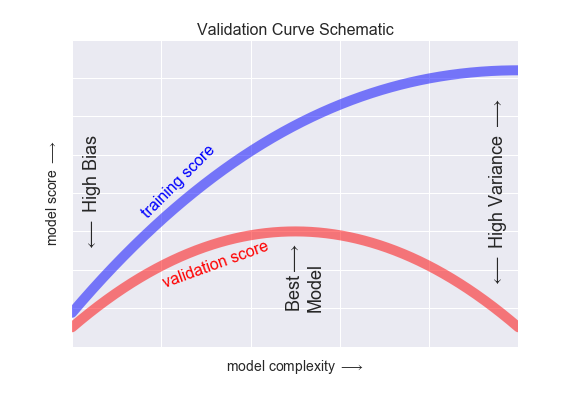

In [22]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
import numpy as np

In [23]:
param_range=np.logspace(-7, 5, 12)
train_scores, valid_scores = validation_curve(Ridge(), 
                                              X_train_scaled, 
                                              y_train, 
                                              param_range=param_range, 
                                              param_name='alpha', cv=10)

In [24]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

Text(0, 0.5, 'Score')

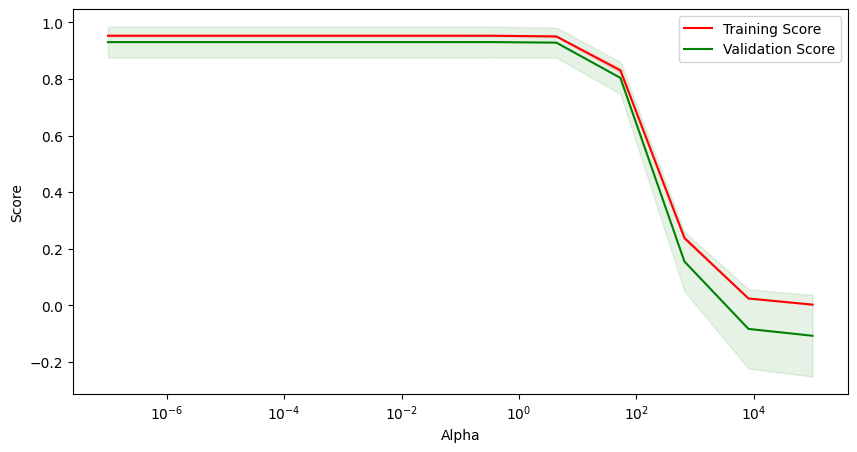

In [34]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.semilogx(param_range, train_scores_mean, label='Training Score', color='red')
axes.semilogx(param_range, valid_scores_mean, label='Validation Score', color='green')
axes.fill_between(param_range, 
                  valid_scores_mean - valid_scores_std,
                  valid_scores_mean + valid_scores_std,
                  color='green',
                  alpha=0.1)
axes.fill_between(param_range, 
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  color='red',
                  alpha=0.1)
axes.legend()
axes.set_xlabel('Alpha')
axes.set_ylabel('Score')

### Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.linspace(0.1, 1.2, 11),
              'fit_intercept': [True, False]}

search = GridSearchCV(Ridge(), param_grid, scoring='r2', cv=10)

search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.1 , 0.21, 0.32, 0.43, 0.54, 0.65, 0.76, 0.87, 0.98, 1.09, 1.2 ]),
                         'fit_intercept': [True, False]},
             scoring='r2')

In [27]:
search.best_params_

{'alpha': 0.6499999999999999, 'fit_intercept': True}

In [28]:
model = search.best_estimator_

In [29]:
model.fit(X_train_scaled, y_train)

Ridge(alpha=0.6499999999999999)

In [30]:
y_pred_test = model.predict(X_test_scaled)

Text(0, 0.5, 'actual')

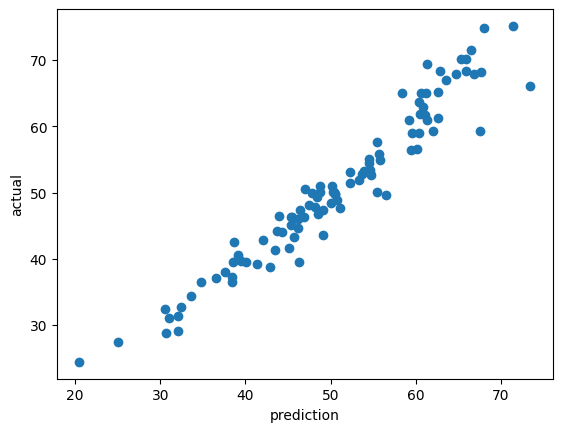

In [31]:
plt.scatter(y_pred_test, y_test)
plt.xlabel('prediction')
plt.ylabel('actual')

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.9360504082690375